# DecisionTree
https://scikit-learn.ru/stable/modules/tree.html#tree-algorithms

Непараметрический метод контролируемого обучения для задач классификации и регрессии. Предсказывает значение целевой переменной путем обучения простым правилам принятия решений, выведенным из характеристик данных. Дерево можно рассматривать как кусочно-постоянную аппроксимацию. \
Предсказание осуществляется проходом образца обученному дереву до некоторого листа.
## Алгоритм построения
**Split** - разбиение бинарным вопросом

$$
B(x, j, t) = [ x_j \le t ] 
$$
$x_j$  -  j-ый признак\
$t$  -  Порог разбиения (Уникальное значение, среднее арифметическое соседних элементов отсортированной выборки)

Задача сводится к поиску наилучшего разбиения.
$$
(j_{opt}, t_{opt}) = agmin L(B_{jt}, X, y)
$$
$L$ - Функция потери \
$j_{opt}$ - Номер признака \
$t_{opt}$ - Пороговое значение \
$B_{jt}$ - Разбиение множества X по признаку j и порогу t (деление на 2 подмножества) \
$argmin$ - Мы ищем такое j и t что минимизируют функцию потерь

**ID3** - Жадный алгоритм для поиска наилучшего разбиения, производит все возможные уникальные разбиения, после чего выбирает тот сплит, что имеет наибольший прирост информации.

**Прирост информации(Information gain)** - Рассчитывается как разность между **критерием информативности** в узле и суммой нормированных критериев в разбиениях. В общем виде: 
$$
IG = H_{root} - (\frac{n_{left}}{n_{node}}H_{left} + \frac{n_{right}}{n_{node}}H_{right})
$$
$H_{root}$ - Критерий информативности в текущем узле\
$H_{left}$/$H_{right}$ - Критерий информативности в левом и правом подмножестве после разбиения\
$n_{node}$ - Количество элементов в родительском узле\
$n_{left}$/$n_{right}$ - Количество элементов в левом и правом подмножестве после разбиения

-----

## Регрессия
Предсказание — среднее значение целевой переменной

В качестве **критерия информативности** для задачи регрессии могут выступать функции потерь.\
разность между ошибкой в узле и суммой нормированных ошибок в разбиении
$$
IG = MSE_{root} - (\frac{n_{left}}{n_{node}}MSE_{left} + \frac{n_{right}}{n_{node}}MSE_{right})
$$
## Классификация
Предсказание — мода (самый частый класс в листе)
### Индекс gini
Рассчитывается как разность между единицей и суммой квадратов вероятностей быть каждым классом
$$H(X) = 1 - \sum_{k=1}^K{p_k^2}$$
Или как сумма вероятностей быть каждым классом умноженных на единицу минус этой веротности
$$H(X) = \sum^{K}_{k=1}p_{k}(1-p_{k})$$
### Энтропия Шенона
Сумма вероятностей быть каждым классом, умноженная на логарифм по основанию двойки этой вероятности.\
Предполагается что логарифм по основанию 2 от нуля = нулю.
$$H(X) = - \sum^{K}_{k=1}p_{k}\text{log}_{2}p_{k}.$$

--------
## Гиперпараметры
**`max_depth`** - Глубина дерева. Максимальное количество уровней с вопросами. Чем глубже дерево тем оно сложнее.\
В случаии переобучения - уменьшить 

**`min_samples_leaf`**  - Минимальное количество объектов в одном листе. В ситуации с высокой сложностью дерева, оно может выродиться в листы с одним элементом в выборке.\
В случаии переобучения - увеличить(Остановить ветвлении при достижении порогового количества значений в сэмпле листа)

**`max_leaf_nodes`** - Максимальное количество листьев. При большом количестве листьев, есть вероятность возникновения той же проблемы, что дерево выродилось в листья с одним элементом в сэмпле.\
В случаии переобучения - **уменьшить**

**`ccp_alpha`**


## Pruning

# DecisionTreeClassifier

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [197]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree

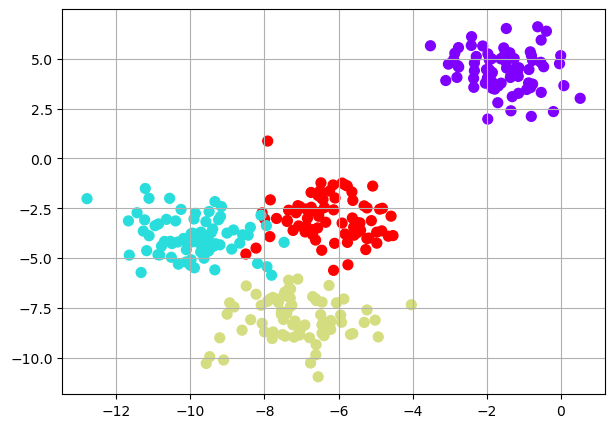

In [66]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=1)

plt.figure(figsize=(7, 5))
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [97]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

DecisionTreeClassifier()

## Атрибуты

In [114]:
tree_clf.score(X, y) # Точность дерева

1.0

In [96]:
print(  f' Важность признаков: {tree_clf.feature_importances_}\n',
        f'Количество листов: {tree_clf.get_n_leaves()}\n',
        f'Глубина дерева: {tree_clf.get_depth()}\n'
     )

 Важность признаков: [0.63940741 0.36059259]
 Количество листов: 11
 Глубина дерева: 7



## Визуализация дерева

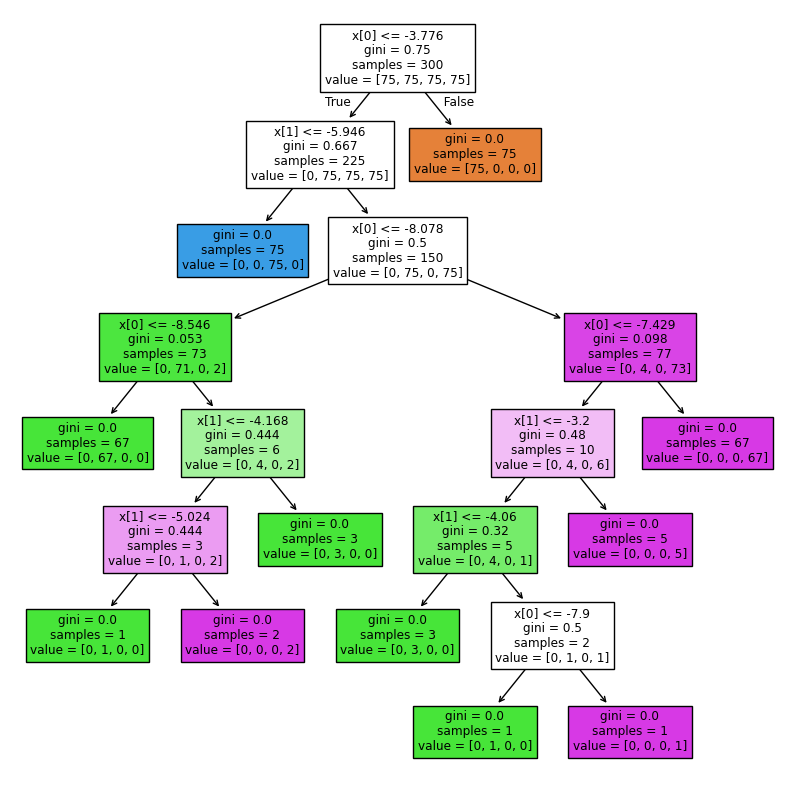

In [98]:
plt.figure(figsize=(10, 10))
plot_tree(tree_clf, filled=True);

## Визуализация границ

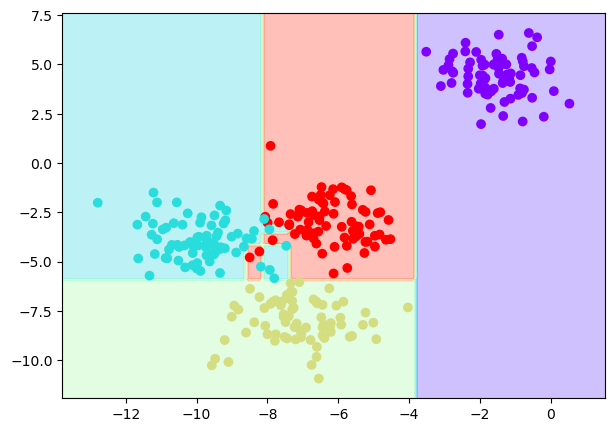

In [67]:
from sklearn.inspection import DecisionBoundaryDisplay
fig, ax=plt.subplots(figsize=(7, 5))
dbd = DecisionBoundaryDisplay.from_estimator(tree_clf, X, ax=ax, response_method="predict", cmap='rainbow', alpha=0.3)
dbd.ax_.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow');

## Post-pruning

In [100]:
path = tree_clf.cost_complexity_pruning_path(X, y)
ccp_alphas = path.ccp_alphas
ccp_alphas

array([0.        , 0.00266667, 0.00432268, 0.00997403, 0.21175058,
       0.25      ])

In [101]:
trees = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X, y)
    trees.append(clf)

In [115]:
from sklearn.model_selection import cross_val_score
cv_scores = [cross_val_score(tree, X, y, cv=5).mean() for tree in trees]

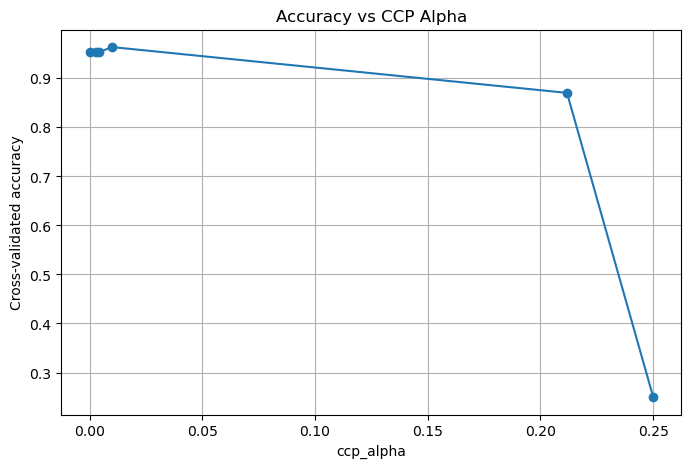

In [131]:
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, cv_scores, marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Cross-validated accuracy")
plt.title("Accuracy vs CCP Alpha")
plt.grid(True)
plt.show()

In [117]:
best_index = np.argmax(cv_scores)
best_tree = trees[best_index]
print(f"Лучшее ccp_alpha: {ccp_alphas[best_index]}, точность: {cv_scores[best_index]:.3f}")


Лучшее ccp_alpha: 0.009974025974025968, точность: 0.963


In [119]:
best_tree = DecisionTreeClassifier(ccp_alpha=ccp_alphas[best_index])
best_tree

DecisionTreeClassifier(ccp_alpha=0.009974025974025968)

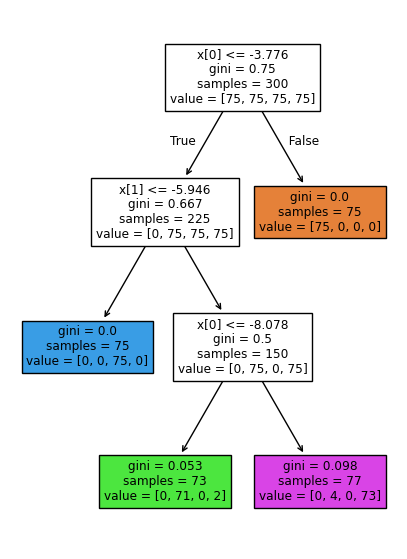

In [133]:
plt.figure(figsize=(5,7))
best_tree.fit(X, y)
plot_tree(best_tree, filled=True);

In [128]:
best_tree.score(X, y)

0.98

# DecisionTreeRegressor

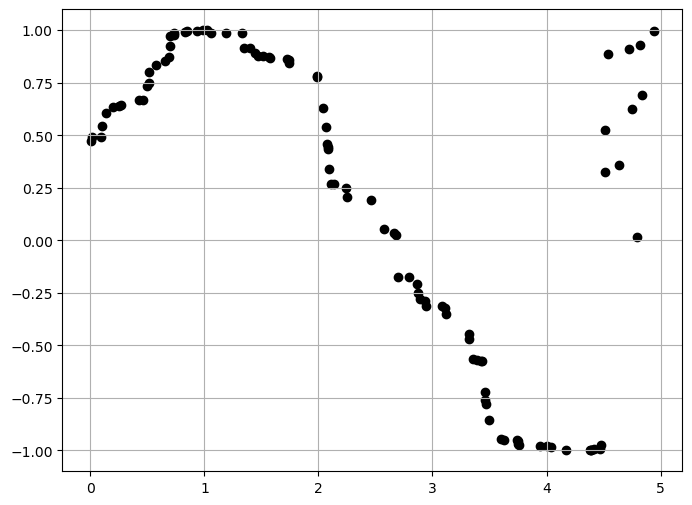

In [244]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(100, 1), axis=0)
y = np.sin(X[10:]).ravel()
y = np.concatenate((y, rng.rand(10, 1).ravel()))
plt.figure(figsize=(8,6))
plt.grid()
plt.scatter(X, y, c='k');

In [245]:
from sklearn.tree import DecisionTreeRegressor
tree_reg_md2 = DecisionTreeRegressor(max_depth=2)
tree_reg_md5 = DecisionTreeRegressor(max_depth=5)
tree_reg_md7 = DecisionTreeRegressor(max_depth=7)

tree_reg_md2.fit(X, y)
tree_reg_md5.fit(X, y)
tree_reg_md7.fit(X, y)

DecisionTreeRegressor(max_depth=7)

In [246]:
X_test = np.linspace(0, 5, 50).reshape(-1, 1)

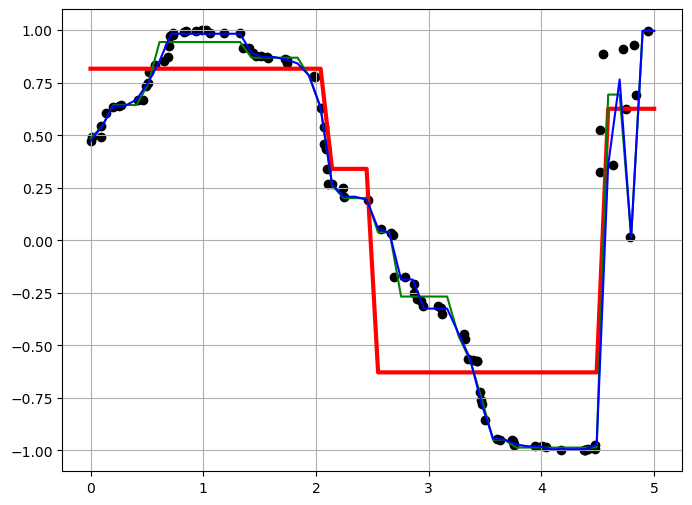

In [247]:
y_pred_md2 = tree_reg_md2.predict(X_test)
y_pred_md5 = tree_reg_md5.predict(X_test)
y_pred_md7 = tree_reg_md7.predict(X_test)

plt.figure(figsize=(8,6))
plt.grid()

plt.plot(X_test, y_pred_md2, c='red', linewidth=3)
plt.plot(X_test, y_pred_md5, c='green')
plt.plot(X_test, y_pred_md7, c='blue')
plt.scatter(X, y, c='k');

# From Scratch

In [81]:
import numpy as np
from scipy.stats import mode

## DecisionTreeClassifier

In [82]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

In [140]:
class DecTreeClassifier:
    def __init__(self, criterion='entropy', max_depth=10, min_samples=10):
        self.criterion = criterion # Выбранный критерий
        self.max_depth = max_depth # Глубина дерева
        self.min_samples = min_samples # Минимальное количество листьев
        self.tree = None

    def fit(self, X, y):
        self.tree = self.grow_tree(X, y) # Сохраняем выращенное дерево в переменную

    def predict(self, X):
        return np.array([self.travers_tree(x, self.tree) for x in X])

    def criterion_calc(self, y):
        # Для джини
        if self.criterion == 'gini':
            pk = np.bincount(y) / len(y)
            return 1 - np.sum([p**2 for p in pk if p>0])
            
        # Для энтропии Шенона
        if self.criterion == 'entropy':
            pk = np.bincount(y) / len(y)
            return -np.sum([p * np.log2(p) for p in pk if p > 0])
    
    def most_common(self, y): # Мода классификатора
        lebels = np.unique(y)
        return mode(lebels)[0]
        
    def best_split(self, X, y):
        best_feature, best_threshold = None, None # Лучший признак, значение для разбиения
        best_gain = -np.inf

        for i in range(X.shape[1]): # для каждого признака
            thresholds = np.unique(X[:, i]) # Все уникальные разбиения
            for threshold in thresholds: # Для каждого разбиения
                gain = self.inforamtion_gain(X[:, i], y, threshold) # Вычисление прироста информации
                if gain>best_gain:
                    best_gain = gain
                    best_feature = i
                    best_threshold = threshold
                    
        return best_feature, best_threshold
                
                
    def inforamtion_gain(self, X_column, y, threshold):
        # Критерий останова
        if len(np.unique(y)) == 1:
            return 0 
        
        n_node = len(y)
        H_root = self.criterion_calc(y) # Критерий для родительского узла
        
        left_indices = np.argwhere(X_column <= threshold).reshape(-1)
        right_indices = np.argwhere(X_column > threshold).reshape(-1)

        H_left, n_left = self.criterion_calc(y[left_indices]), len(left_indices)
        H_right, n_right = self.criterion_calc(y[right_indices]), len(right_indices)

        # Прирост информации
        IG = H_root - ( (n_left/n_node)*H_left + (n_right/n_node)*H_right )
        return IG
    
    def grow_tree(self, X, y, depth=0):
        # Рекурсивное построение древа
        
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if n_samples <= self.min_samples or depth >= self.max_depth or n_labels == 1:
            return Node(value=self.most_common(y))

        best_feature, best_threshold = self.best_split(X, y)
        
        left_indices = np.argwhere(X[:, best_feature] <= best_threshold).flatten()
        right_indices = np.argwhere(X[:, best_feature] > best_threshold).flatten()

        if len(left_indices) == 0 or len(right_indices) == 0:
            return Node(value=self.most_common(y))

        LEFT = self.grow_tree(X[left_indices, :], y[left_indices], depth+1)
        RIGHT = self.grow_tree(X[right_indices, :], y[right_indices], depth+1)

        return Node(best_feature, best_threshold, LEFT, RIGHT)

    def travers_tree(self, x, tree):
        if tree.is_leaf_node():
            return tree.value

        if x[tree.feature] <= tree.threshold:
            return self.travers_tree(x, tree.left)
        return self.travers_tree(x, tree.right)
    

### Test

In [124]:
X, y = make_classification(n_samples=100)

In [137]:
y

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0])

In [136]:
clf = DecTreeClassifier(criterion='gini', max_depth=5)
clf.fit(X, y)
y_pred = clf.predict(X)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0])

In [138]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.97

## DecisionTreeRegressor

In [139]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

In [169]:
class DecTreeRegressor:
    def __init__(self, criterion='MSE', max_depth=10, min_samples=10):
        self.criterion = criterion # Выбранный критерий
        self.max_depth = max_depth # Глубина дерева
        self.min_samples = min_samples # Минимальное количество листьев
        self.tree = None

    def fit(self, X, y):
        self.tree = self.grow_tree(X, y) # Сохраняем выращенное дерево в переменную

    def predict(self, X):
        return np.array([self.travers_tree(x, self.tree) for x in X])

    def criterion_calc(self, y):
        # Для MSE
        if self.criterion == 'MSE':
            predict = np.mean(y)
            mse = np.mean((predict-y)**2)
            return mse
            
    def most_common(self, y): # Среднее регрессора
        return np.mean(y)
        
    def best_split(self, X, y):
        best_feature, best_threshold = None, None # Лучший признак, значение для разбиения
        best_gain = -np.inf

        for i in range(X.shape[1]): # для каждого признака
            thresholds = np.unique(X[:, i]) # Все уникальные разбиения
            for threshold in thresholds: # Для каждого разбиения
                gain = self.inforamtion_gain(X[:, i], y, threshold) # Вычисление прироста информации
                if gain>best_gain:
                    best_gain = gain
                    best_feature = i
                    best_threshold = threshold
                    
        return best_feature, best_threshold
                
                
    def inforamtion_gain(self, X_column, y, threshold):
        # Критерий останова
        if len(np.unique(y)) == 1:
            return 0 
        
        n_node = len(y)
        H_root = self.criterion_calc(y) # Критерий для родительского узла
        
        left_indices = np.argwhere(X_column <= threshold).reshape(-1)
        right_indices = np.argwhere(X_column > threshold).reshape(-1)

        child = 0
        
        if len(left_indices) != 0:
            H_left, n_left = self.criterion_calc(y[left_indices]), len(left_indices)
            child += (n_left/n_node)*H_left
        if len(right_indices) != 0:
            H_right, n_right = self.criterion_calc(y[right_indices]), len(right_indices)
            child += (n_right/n_node)*H_right

        # Прирост информации
        IG = H_root - child
        return IG
    
    def grow_tree(self, X, y, depth=0):
        # Рекурсивное построение древа
    
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if n_samples <= self.min_samples or depth >= self.max_depth or n_labels == 1:
            return Node(value=self.most_common(y))

        best_feature, best_threshold = self.best_split(X, y)
        
        left_indices = np.argwhere(X[:, best_feature] <= best_threshold).flatten()
        right_indices = np.argwhere(X[:, best_feature] > best_threshold).flatten()

        if len(left_indices) == 0 or len(right_indices) == 0:
            return Node(value=self.most_common(y))

        LEFT = self.grow_tree(X[left_indices, :], y[left_indices], depth+1)
        RIGHT = self.grow_tree(X[right_indices, :], y[right_indices], depth+1)

        return Node(best_feature, best_threshold, LEFT, RIGHT)

    def travers_tree(self, x, tree):
        if tree.is_leaf_node():
            return tree.value

        if x[tree.feature] <= tree.threshold:
            return self.travers_tree(x, tree.left)
        return self.travers_tree(x, tree.right)
    

In [190]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=20, noise=1)

In [191]:
y

array([ 165.37139533, -135.72411287,   -3.09854604,   63.22404287,
       -345.26816063, -275.25094791,  202.87455294,  361.62407036,
       -224.48142022,   11.85576368, -165.27361229,  -25.15732421,
        -19.54018487, -144.56723127,  272.82974741, -244.4050322 ,
        150.92116511, -257.64010702,   83.93502429,   40.70750979])

In [192]:
reg = DecTreeRegressor(max_depth=20, min_samples=1)
reg.fit(X, y)
y_pred = reg.predict(X)
y_pred

array([ 165.37139533, -135.72411287,   -3.09854604,   63.22404287,
       -345.26816063, -275.25094791,  202.87455294,  361.62407036,
       -224.48142022,   11.85576368, -165.27361229,  -25.15732421,
        -19.54018487, -144.56723127,  272.82974741, -244.4050322 ,
        150.92116511, -257.64010702,   83.93502429,   40.70750979])

In [193]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
print(r2_score(y, y_pred))
print(mean_squared_error(y, y_pred))

1.0
0.0


--------

```python
np.bincount
np.argwhere
flatten /reshape